In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

base_path = 'statistic_files'

var = pd.read_csv(base_path + '/statistic_variable.csv', encoding = 'big5', header = None)
data = pd.read_csv(base_path + '/statistic_data.csv', header = None)
data.rename(columns = var[0])

,No,Company,sex,age,Area,marriage,Use_time,Update,Q1,Q2,Q3,Q4,Q5,Q6,Loyalty,AGE1,AREA1,平均滿意度
0,101,1,2,2,1,1,5,0,2,4,4,4,4,4,4,2,1,3.67
1,102,1,1,3,1,2,4,1,2,2,4,4,4,5,3,3,1,3.50
2,103,1,2,1,1,1,5,0,2,5,4,5,4,4,4,1,1,4.00
3,104,1,2,3,1,2,1,1,3,3,1,1,2,3,2,3,1,2.17
4,105,1,1,2,1,1,2,0,3,3,5,5,5,4,4,2,1,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,805,2,2,2,1,1,1,0,1,3,3,4,4,4,3,2,1,3.17
218,806,2,1,2,1,1,4,1,2,2,4,4,4,4,4,2,1,3.33
219,807,2,2,2,1,1,3,0,3,3,3,4,5,4,3,2,1,3.67
220,808,2,1,1,1,1,6,1,1,3,4,5,4,4,4,1,1,3.50


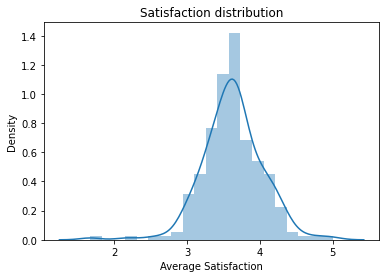

H0 : 整體平均滿意度平均為3.6
H1 : 整體平均滿意度平均不為3.6
test statistic :
t - test = 0.8657761236466914
95 % confidence level(one-tailed) : (3.5690701245144743, 3.679398343953996)
Analysis Result :
p - value = 0.3875518380566505 >= 0.05 不反對H0假設


In [2]:
import statsmodels.stats.weightstats
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data[17])
plt.title('Satisfaction distribution')
plt.xlabel('Average Satisfaction')
plt.show()
alpha = 0.05

print('H0 : 整體平均滿意度平均為3.6')
print('H1 : 整體平均滿意度平均不為3.6')
print('test statistic :')
t, t_pval = scipy.stats.ttest_1samp(data[17], popmean = 3.6)
print('t - test =', t)
CL = scipy.stats.t.interval(1 - alpha, len(data[17]) - 1, data[17].mean(), data[17].std() / np.sqrt(len(data[17])))
print('95 % confidence level(one-tailed) :', CL )
print('Analysis Result :')
if t_pval >= alpha:
    print('p - value =', t_pval, '>=', alpha, '不反對H0假設')
else :
    print('p - value =', t_pval, '<', alpha, '反對H0假設')

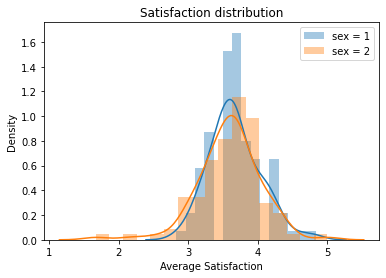

H0 : 男女性別對此軟體之滿意度平均無顯著差別
H1 : 男女性別對此軟體之滿意度平均有顯著差別
test statistic :
t - test = 1.4276502548839034
95 % confidence level(two-tailed) : (-0.2737849838207286, 0.4336740268165672)
Analysis Result :
p - value(two-tailed) = 0.15481046284639347 >= 0.05 不反對H0假設


In [3]:
sns.distplot(data.loc[data[2] == 1][17], label = 'sex = 1')
sns.distplot(data.loc[data[2] == 2][17], label = 'sex = 2')
plt.title('Satisfaction distribution')
plt.xlabel('Average Satisfaction')
plt.legend()
plt.show()
alpha = 0.05

print('H0 : 男女性別對此軟體之滿意度平均無顯著差別')
print('H1 : 男女性別對此軟體之滿意度平均有顯著差別')
print('test statistic :')
t, t_pval = scipy.stats.ttest_ind(data.loc[data[2] == 1][17], data.loc[data[2] == 2][17], equal_var = True)
print('t - test =', t)
sample_mean = data.loc[data[2] == 1][17].mean() - data.loc[data[2] == 2][17].mean()
se = np.sqrt(data.loc[data[2] == 1][17].std() ** 2 / np.sqrt(len(data.loc[data[2] == 1])) + data.loc[data[2] == 2][17].std() ** 2 / np.sqrt(len(data.loc[data[2] == 2])))
CL = scipy.stats.t.interval(1 - alpha, len(data[17]), sample_mean, se)
print('95 % confidence level(two-tailed) :', CL )
print('Analysis Result :')
if t_pval  >= alpha:
    print('p - value(two-tailed) =', t_pval , '>=', alpha, '不反對H0假設')
else :
    print('p - value(two-tailed) =', t_pval , '<', alpha, '反對H0假設')

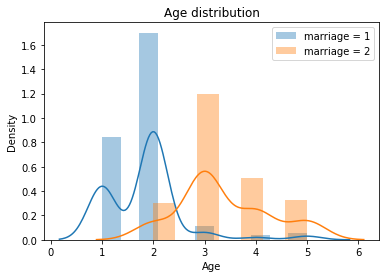

H0 : 年齡層對結婚結果影響不大，即結婚意願在年齡層相同
H1 : 年齡層對結婚結果有一定影響，即結婚意願在年齡層不同
test statistic :
t - test = -13.736778905521412
95 % confidence level(two-tailed) : (-2.2709753000274353, -0.8198366657845307)
Analysis Result :
p - value(two-tailed) = 2.031846107125276e-31 < 0.05 反對H0假設


In [4]:
sns.distplot(data.loc[data[5] == 1][3], label = 'marriage = 1')
sns.distplot(data.loc[data[5] == 2][3], label = 'marriage = 2')
plt.title('Age distribution')
plt.xlabel('Age')
plt.legend()
plt.show()

print('H0 : 年齡層對結婚結果影響不大，即結婚意願在年齡層相同')
print('H1 : 年齡層對結婚結果有一定影響，即結婚意願在年齡層不同')
print('test statistic :')
t, t_pval = scipy.stats.ttest_ind(data.loc[data[5] == 1][3], data.loc[data[5] == 2][3], equal_var = True)
print('t - test =', t)
sample_mean = data.loc[data[5] == 1][3].mean() - data.loc[data[5] == 2][3].mean()
se = np.sqrt(data.loc[data[5] == 1][3].std() ** 2 / np.sqrt(len(data.loc[data[5] == 1])) + data.loc[data[5] == 2][3].std() ** 2 / np.sqrt(len(data.loc[data[5] == 2])))
CL = scipy.stats.t.interval(1 - alpha, len(data[6]), sample_mean, se)
print('95 % confidence level(two-tailed) :', CL )
print('Analysis Result :')
if t_pval  >= alpha:
    print('p - value(two-tailed) =', t_pval , '>=', alpha, '不反對H0假設')
else :
    print('p - value(two-tailed) =', t_pval , '<', alpha, '反對H0假設')